# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Diego Enrique Vargas Ramirez

- ID: A01635782

- My carreer: ITC


# Importing libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# PART 1

## Do clustering using your assigned dataset

## a) Load data

In [4]:
RunInCollab = True

if RunInCollab:
  from google.colab import drive
  drive.mount('/content/drive')

  Ruta = '/content/drive/MyDrive/SemanaTec/'
else:
  Ruta = ''


url = 'A01635782_X.csv'
df = pd.read_csv(Ruta + url)

Mounted at /content/drive


## b) Data managment


Print the first 7 rows

In [5]:
df.head(7)

Unnamed: 0         x1        x2        x3         x4         x5        x6  \
0           0  -6.894093 -1.378820  5.481309   4.861778  15.069744 -2.361898   
1           1  -5.465518  2.928203  6.897521  -7.213096  -4.307858 -1.574387   
2           2   5.064647  6.872374 -7.031427 -10.505137  -1.536729 -3.240751   
3           3 -10.116864  7.285450  6.077027  -4.433431  -5.048999 -2.923815   
4           4  -6.459899  7.623905  4.931100  -7.047596  -1.447937  0.499236   
5           5   4.186450  5.656563 -8.001533 -11.934275   4.589633 -0.736954   
6           6   0.996244  8.323970 -5.172265 -12.088491   2.247889 -1.494994   

          x7         x8         x9       x10       x11       x12       x13  \
0  -5.828603  -6.473284  10.000891 -9.702412 -5.450412  0.963800 -2.816135   
1   3.081512   9.016520  -5.443919 -6.944674  0.665147 -4.810017  0.733571   
2  10.388181  10.319697   7.710858 -4.485115  3.422771  4.823675 -6.767630   
3   1.401143   7.251857  -6.960548 -1.146005 -3.317742 -4.491597  0.242185   
4  -0.725602   7.666551  -3.983620 -7.039470 -1.034029 -6.682879 -1.719886   
5   5.378878  10.003553   7.205311 -4.568115  5.030022  8.388300 -3.856431   
6   5.159487   8.831396   9.916759 -4.020344  8.182485  3.696635 -1.844835   

         x14        x15  
0  -9.033611   9.415896  
1   9.068706 -11.556076  
2   1.720844  -3.065640  
3  12.048393  -8.618553  
4  10.470773 -11.366742  
5   1.285234  -1.633963  
6   3.280408  -1.319673

Print the last 4 rows

In [6]:
df.tail(4)

Unnamed: 0        x1        x2        x3         x4        x5        x6  \
970         970  3.830820  3.225166 -6.793626 -10.132047  1.009172 -4.179991   
971         971 -9.644999 -0.397960  8.658972   6.998930  5.659007  1.565216   
972         972  4.675079  7.343788 -9.197938  -9.648242 -2.098228 -1.444076   
973         973  0.237017 -4.710512 -3.319733   3.471525  5.233987  3.689022   

           x7        x8         x9       x10       x11       x12       x13  \
970  9.858384  9.010928   3.732640 -1.154558 -0.916563  8.094115 -2.814621   
971 -3.456295 -4.991736  10.067411 -7.326019 -7.337895 -1.316354 -5.771970   
972  9.229938  4.533392   2.201782 -5.128288  2.234248  5.645950 -0.936701   
973  8.014079  6.891089 -10.103825 -6.700699  2.255098  9.646586 -1.882615   

          x14       x15  
970  3.007426 -1.871024  
971 -4.954595  8.003630  
972  3.727892 -3.159034  
973  7.007146 -4.511668

How many rows and columns are in your data?

Use the `shape` method


In [7]:
df.shape

(974, 16)

There are 974 rows and 16 columns

Print the name of all columns

Use the `columns` method

In [8]:
df.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15'],
      dtype='object')

What is the data type in each column

Use the `dtypes` method

In [9]:
df.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
x7            float64
x8            float64
x9            float64
x10           float64
x11           float64
x12           float64
x13           float64
x14           float64
x15           float64
dtype: object

What is the meaning of rows and columns?

Your responses here

1. The data is a series of scattered floating points.

2. The rows being positionj integers.

3. The columns holding a series of different floating positions

With the current information I can't determine exactly what the data is. Although  I can tell it perhaps can represent positions or groupings of items like a population.
...

Print a statistical summary of your columns


In [10]:
df.describe()

Unnamed: 0          x1          x2          x3          x4          x5  \
count  974.000000  974.000000  974.000000  974.000000  974.000000  974.000000   
mean   486.500000   -2.000851    2.040177    1.066416   -2.393579    2.253832   
std    281.313882    5.727632    4.216091    6.033218    6.899115    5.099845   
min      0.000000  -14.066555   -7.338601  -10.936413  -15.516445  -10.420606   
25%    243.250000   -7.033331   -1.543763   -4.594921   -8.944361   -1.407911   
50%    486.500000   -3.186199    2.059207    1.670064   -2.255693    1.840264   
75%    729.750000    3.283330    5.838093    6.671951    4.153414    5.732438   
max    973.000000   10.529635   11.321333   12.464003   10.616229   15.217261   

               x6          x7          x8          x9         x10         x11  \
count  974.000000  974.000000  974.000000  974.000000  974.000000  974.000000   
mean    -0.304991    3.468873    4.643869    0.436129   -6.189128    0.371490   
std      3.689789    5.290389    6.815760    8.124795    3.114283    4.877950   
min     -7.922750  -10.589657  -11.213069  -14.000540  -15.900832  -11.462077   
25%     -2.983101   -1.164337    0.317776   -7.335691   -8.356510   -4.059159   
50%     -1.163687    3.808530    7.150693    0.705466   -5.987525    1.185373   
75%      2.345322    8.307174    9.598902    8.271077   -3.913654    4.514734   
max     10.631264   14.495962   15.485997   14.620866    2.022359   10.603897   

              x12         x13         x14         x15  
count  974.000000  974.000000  974.000000  974.000000  
mean     2.377753   -2.289552    2.633440   -1.952223  
std      6.016131    2.027040    6.389970    7.155966  
min    -12.095126   -8.301615  -11.163016  -13.487273  
25%     -2.636100   -3.728861   -2.067087   -7.636752  
50%      2.436858   -2.324952    3.613193   -3.893274  
75%      7.407696   -0.925129    7.573002    4.229235  
max     16.605938    3.603517   17.430435   15.687877

1. What is the minumum and maximum values of each variable:

  1. 0.00
  2. -14.07
  3. -7.34
  4. -10.94
  5. -15.52
  6. -10.42
  7. -7.92
  8. -10.59
  9. -11.21
  10. -14.00
  11. -15.90
  12. -11.46
  13. -11.46
  14. -12.09
  15. -8.30
  16. -11.16
  17. -13.48


2. What is the mean and standar deviation of each variable:

  These are also represented in the df.describe command.

3. What the 25%, 50% and 75% represent?:

These values represent up to which number is the data below of. For example in x1 the first quartile of 25% lay below 243.250.

Rename the columns using the same name with capital letters

In [11]:
#Rename first column to x0 as it was called unnamed 0
df.rename(columns={'Unnamed: 0': 'X0'}, inplace=True)

#Rename the coulmns using the same name with capital letters
for name in df.columns:
  df.rename(columns={name: name.upper()}, inplace=True)

df.head(1)

X0        X1       X2        X3        X4         X5        X6        X7  \
0   0 -6.894093 -1.37882  5.481309  4.861778  15.069744 -2.361898 -5.828603   

         X8         X9       X10       X11     X12       X13       X14  \
0 -6.473284  10.000891 -9.702412 -5.450412  0.9638 -2.816135 -9.033611   

        X15  
0  9.415896

Rename the columns to their original names

In [12]:
for name in df.columns:
  df.rename(columns={name: name.lower()}, inplace=True)

df.head(1)

x0        x1       x2        x3        x4         x5        x6        x7  \
0   0 -6.894093 -1.37882  5.481309  4.861778  15.069744 -2.361898 -5.828603   

         x8         x9       x10       x11     x12       x13       x14  \
0 -6.473284  10.000891 -9.702412 -5.450412  0.9638 -2.816135 -9.033611   

        x15  
0  9.415896

Use two different alternatives to get one of the columns

In [13]:
df.x0

0        0
1        1
2        2
3        3
4        4
      ... 
969    969
970    970
971    971
972    972
973    973
Name: x0, Length: 974, dtype: int64

In [14]:
df['x0']

0        0
1        1
2        2
3        3
4        4
      ... 
969    969
970    970
971    971
972    972
973    973
Name: x0, Length: 974, dtype: int64

Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [15]:
df.iloc[62:73, 1:3]

x1        x2
62  0.610340 -0.371667
63  2.709819  5.956896
64  3.966179  5.348711
65 -6.100138  4.983696
66  3.738308  8.412347
67 -9.587892  7.789125
68  1.910866  0.103664
69  3.678699  2.438684
70  1.741198 -2.061220
71  1.164103  5.361701
72  4.976193  8.339970

For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [16]:
subdf = df.iloc[:, 1:3]

subdf.isnull().sum()

x1    0
x2    0
dtype: int64

In [17]:
subdf.notnull().sum()

x1    974
x2    974
dtype: int64

We have 0 null in both columns and 974 not null. Thus we have complete data in both of them.

Discard the last column


In [18]:
df = df.iloc[:, :-1]

df.head(1)

x0        x1       x2        x3        x4         x5        x6        x7  \
0   0 -6.894093 -1.37882  5.481309  4.861778  15.069744 -2.361898 -5.828603   

         x8         x9       x10       x11     x12       x13       x14  
0 -6.473284  10.000891 -9.702412 -5.450412  0.9638 -2.816135 -9.033611

### Questions

Based on the previos results, provide a full description of yout dataset

Your response: The dataset is a groupd of 974 floating point rows and 16 integer columns. The data could be related to positions or some form of population or density data. There appears to be no missing data within our observations.




## c) Data visualization

Plot in the histogram of one of the variables

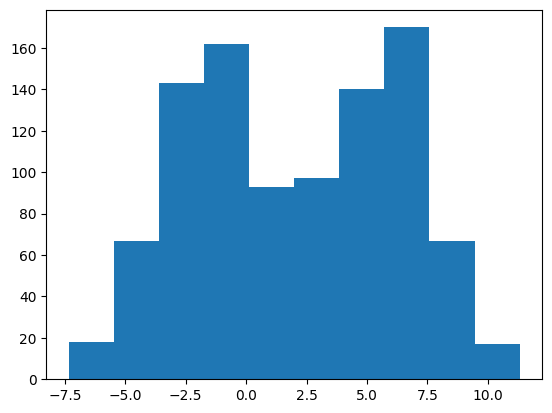

In [19]:
plt.hist(df.x2)
plt.show()

Plot in the same figure the histogram of two variables



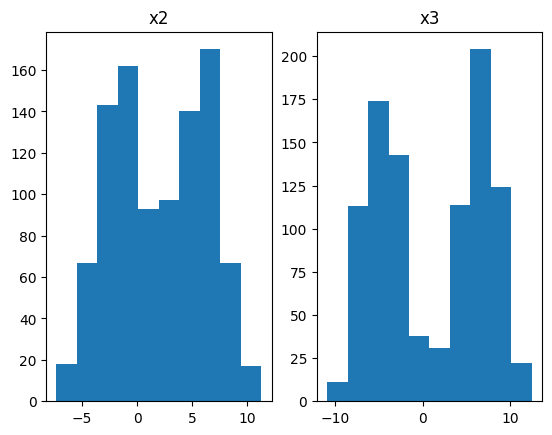

In [20]:
fig, ax = plt.subplots(1,2)
ax[0].hist(df.x2)
ax[0].set_title('x2')
ax[1].hist(df.x3)
ax[1].set_title('x3')
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot the boxplot of one of the variables

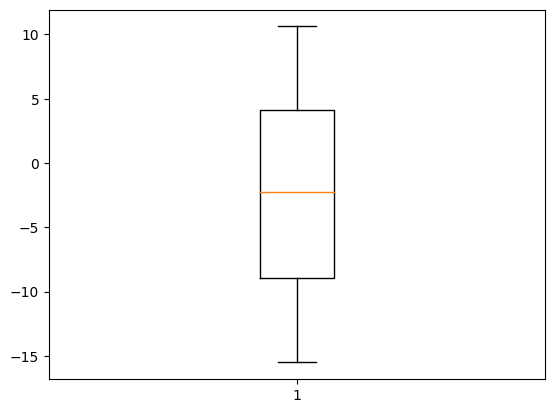

In [21]:
plt.boxplot(df.x4)
plt.show()

Plot in the same figure the boxplot of two variables

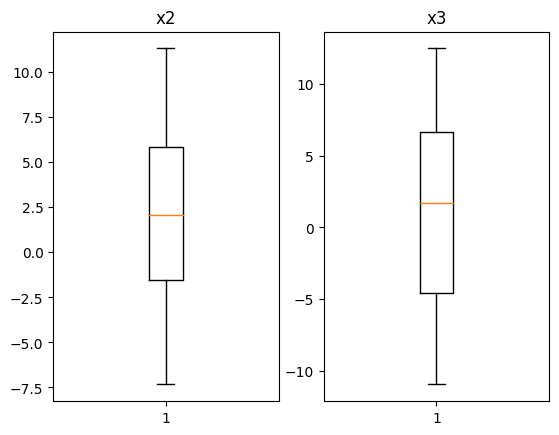

In [22]:
fig, ax = plt.subplots(1,2)
ax[0].boxplot(df.x2)
ax[0].set_title('x2')
ax[1].boxplot(df.x3)
ax[1].set_title('x3')
plt.show()

Based on these plots, provide a description of your data:

Your response here:

Plot the scatter plot between all pair of variables

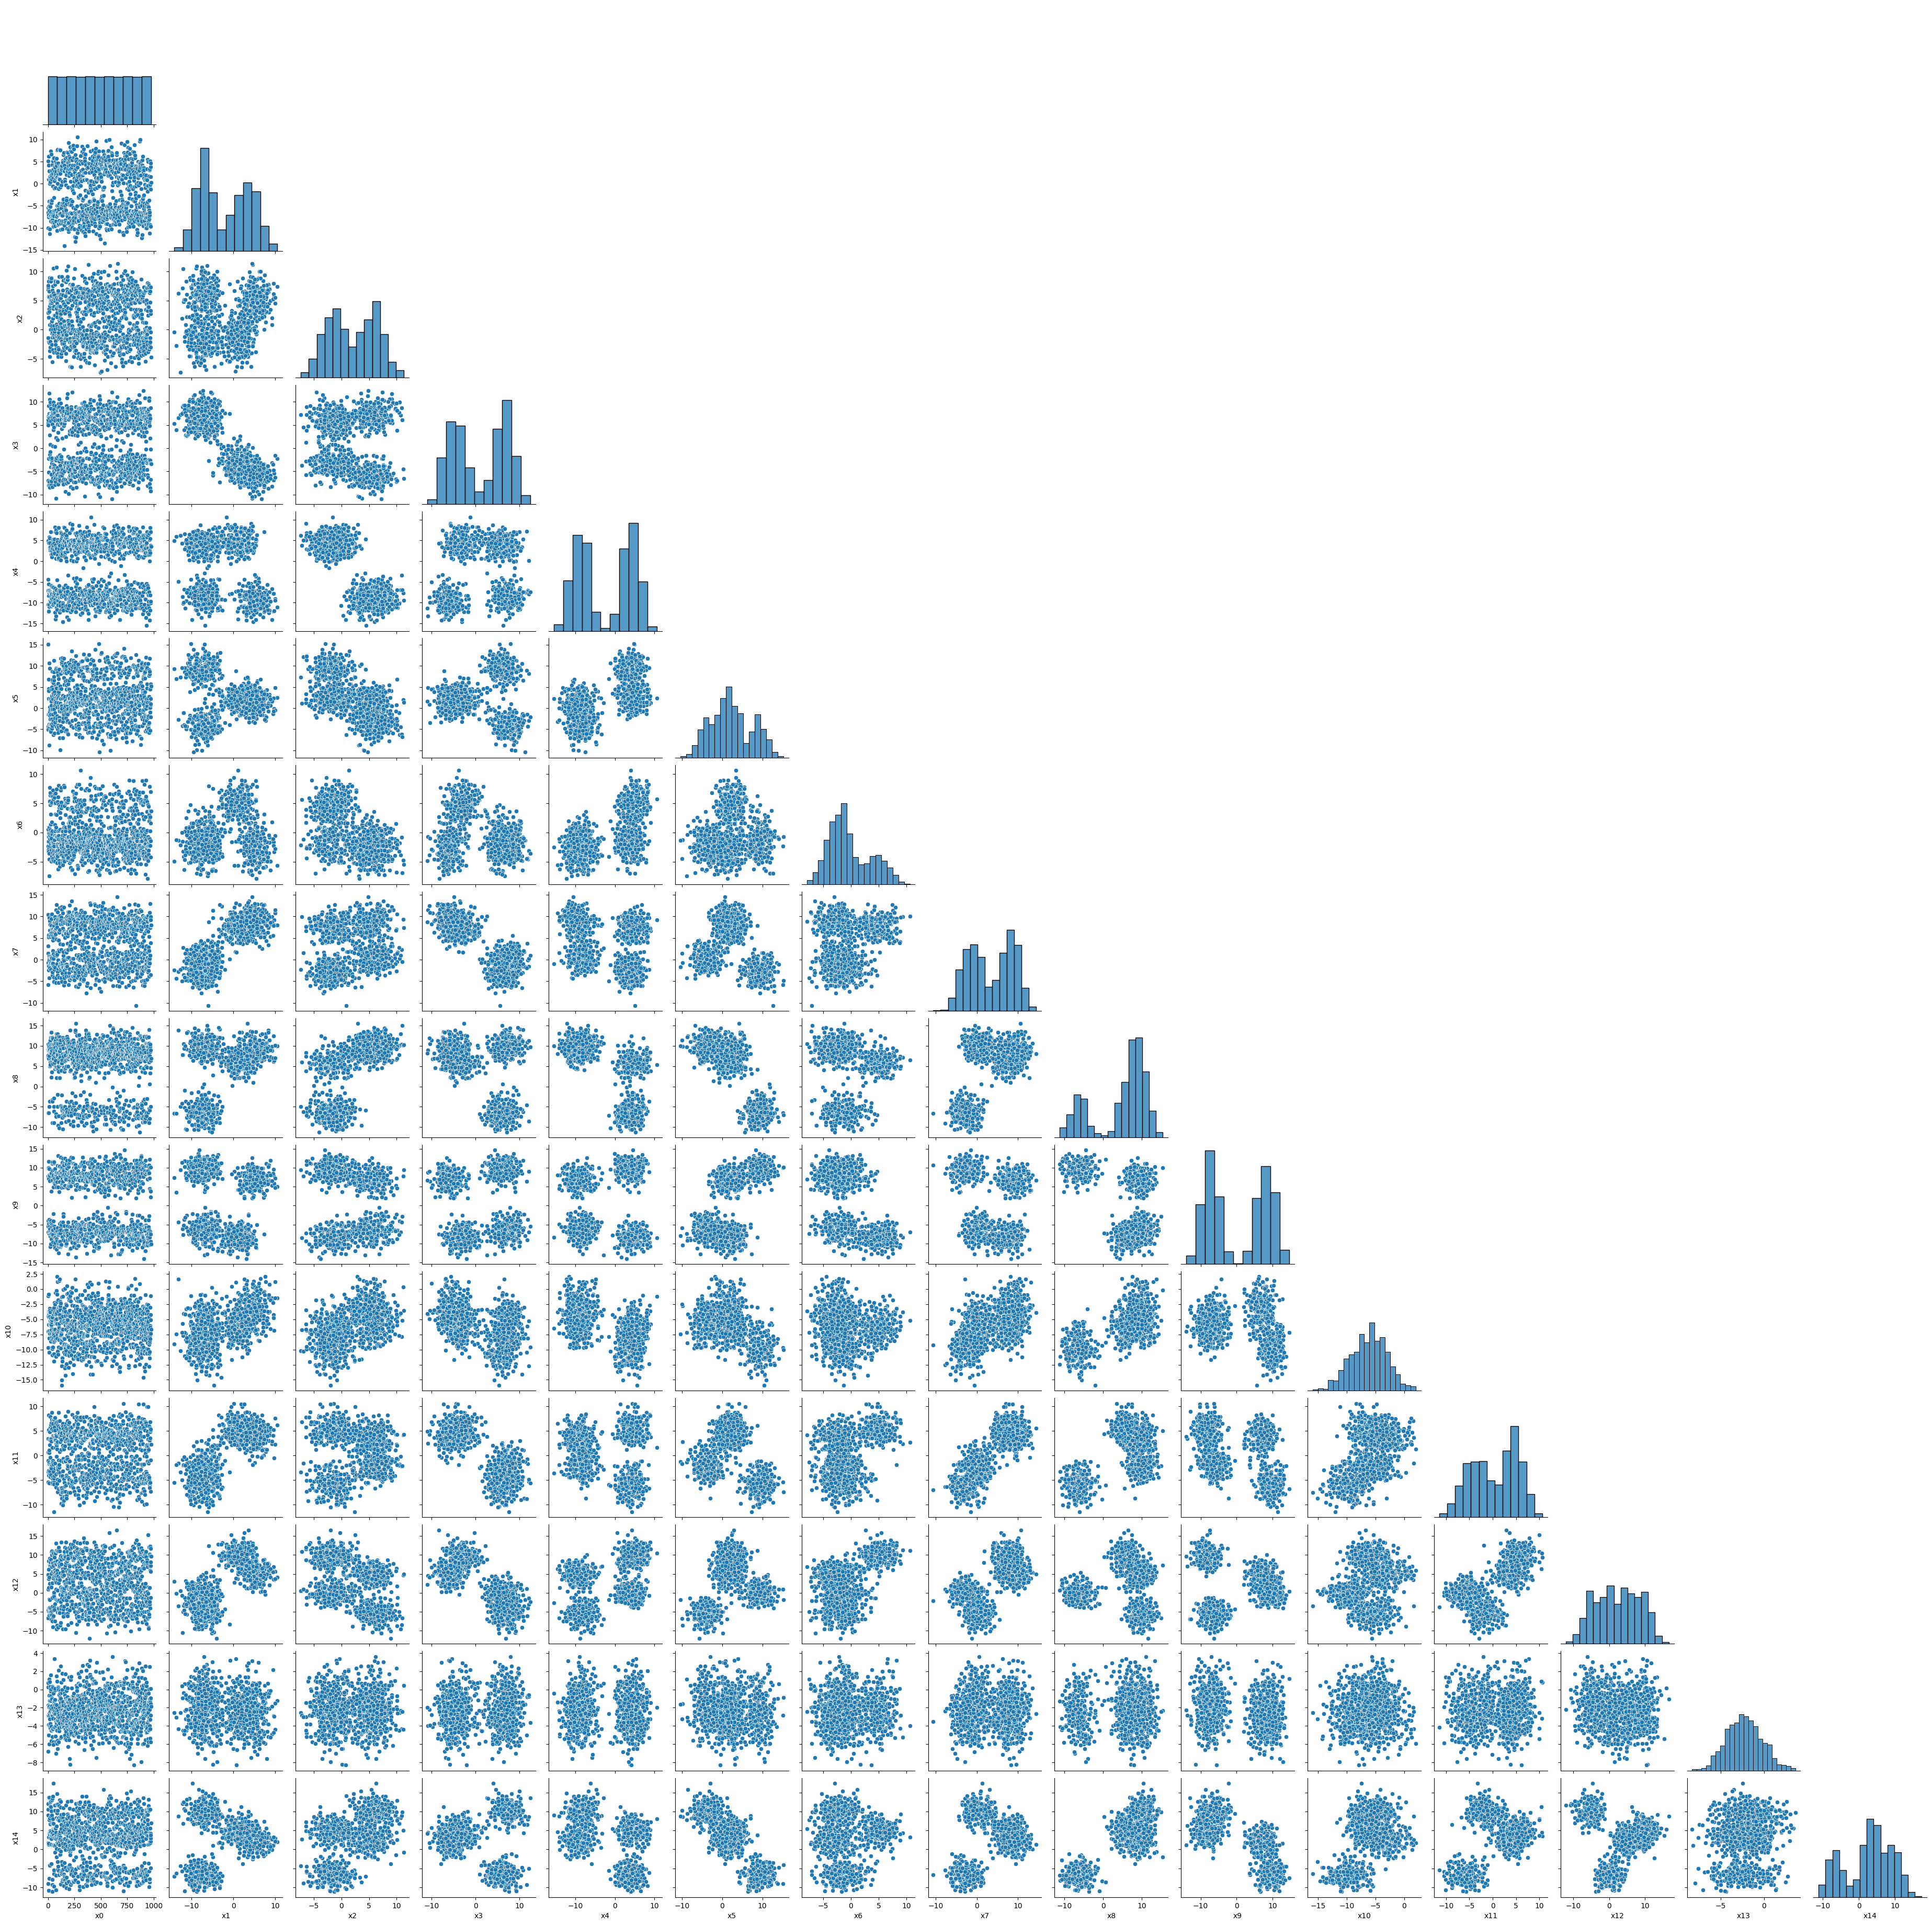

In [23]:
sns.pairplot(df, corner=True)
plt.show()

### Questions

Based on the previos plots, provide a full description of yout dataset

Your response: The dataset provides a bunch of variables that show a more or less normal distribution. These data when matched against each other can crate either a very scattered plotting or clustering into bunches of 2 to 4. The x0 variable is the one that creates much more noise due to its values.




## d) Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plots

In [30]:
from sklearn.cluster import KMeans

K = 4
kmeans = KMeans(n_clusters=K, random_state=0).fit(np.array(df[['x1','x2']]))

print(kmeans.labels_)

[0 2 1 2 2 1 1 2 0 1 0 2 2 1 2 3 0 3 2 1 2 3 2 3 3 2 2 2 2 1 2 1 3 1 1 0 3
 2 3 3 2 1 0 0 0 2 3 2 3 1 2 1 2 3 1 0 0 0 2 1 3 2 3 1 1 2 1 2 3 1 3 1 1 3
 3 0 0 3 1 1 1 3 2 3 2 2 1 2 3 0 2 3 0 1 2 1 2 0 3 3 2 3 3 0 2 0 3 1 0 1 1
 1 2 3 1 1 3 3 2 0 2 2 0 1 2 3 0 3 3 0 0 1 0 1 0 0 0 0 3 1 2 1 1 0 0 2 2 1
 2 0 0 0 1 3 3 0 0 3 3 3 1 0 0 1 1 3 0 2 3 3 0 2 0 2 2 0 3 0 0 1 1 1 2 3 2
 3 2 2 1 3 1 3 2 0 1 1 0 0 1 1 1 0 3 0 2 0 1 3 1 3 1 0 0 1 1 3 0 0 0 2 0 0
 2 1 3 1 3 0 2 1 3 0 0 1 0 1 3 2 0 3 0 1 0 1 3 0 1 3 3 3 3 0 2 3 1 3 0 0 1
 2 1 0 2 3 1 0 2 3 1 3 3 2 1 2 1 2 1 3 0 3 1 3 2 3 0 2 3 2 2 2 0 3 3 2 3 3
 0 2 1 0 2 0 2 3 1 3 1 3 0 3 1 3 0 0 0 3 0 2 1 3 3 1 2 1 0 2 1 0 3 0 3 0 0
 2 0 0 0 1 3 1 0 3 0 2 0 3 2 1 2 1 1 3 3 1 1 2 1 2 2 0 2 0 0 2 0 3 3 2 3 0
 0 1 0 0 2 0 1 2 3 2 2 2 1 2 2 2 3 0 2 2 0 3 2 2 1 1 0 3 0 1 1 0 3 3 3 0 3
 3 0 3 0 0 1 0 1 1 1 2 2 0 3 0 1 0 1 2 0 3 1 0 2 2 3 2 2 3 0 3 0 1 1 0 3 1
 0 1 2 1 0 0 3 3 3 3 1 0 3 1 0 1 2 3 0 1 2 3 2 0 2 1 2 1 2 1 1 1 3 2 3 3 1
 2 3 0 2 3 0 2 1 3 2 2 1 

Add to your dataset a column with the estimated cluster to each data point

In [31]:
df['cluster'] = kmeans.labels_

df.head(1)

x0        x1       x2        x3        x4         x5        x6        x7  \
0   0 -6.894093 -1.37882  5.481309  4.861778  15.069744 -2.361898 -5.828603   

         x8         x9       x10       x11     x12       x13       x14  \
0 -6.473284  10.000891 -9.702412 -5.450412  0.9638 -2.816135 -9.033611   

   cluster  
0        0

Print the number associated to each cluster

In [32]:
kmeans.labels_

array([0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 0, 2, 2, 1, 2, 3, 0, 3, 2, 1, 2, 3,
       2, 3, 3, 2, 2, 2, 2, 1, 2, 1, 3, 1, 1, 0, 3, 2, 3, 3, 2, 1, 0, 0,
       0, 2, 3, 2, 3, 1, 2, 1, 2, 3, 1, 0, 0, 0, 2, 1, 3, 2, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 1, 1, 3, 3, 0, 0, 3, 1, 1, 1, 3, 2, 3, 2, 2, 1, 2,
       3, 0, 2, 3, 0, 1, 2, 1, 2, 0, 3, 3, 2, 3, 3, 0, 2, 0, 3, 1, 0, 1,
       1, 1, 2, 3, 1, 1, 3, 3, 2, 0, 2, 2, 0, 1, 2, 3, 0, 3, 3, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 3, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 0, 0, 0, 1, 3,
       3, 0, 0, 3, 3, 3, 1, 0, 0, 1, 1, 3, 0, 2, 3, 3, 0, 2, 0, 2, 2, 0,
       3, 0, 0, 1, 1, 1, 2, 3, 2, 3, 2, 2, 1, 3, 1, 3, 2, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 3, 0, 2, 0, 1, 3, 1, 3, 1, 0, 0, 1, 1, 3, 0, 0, 0, 2,
       0, 0, 2, 1, 3, 1, 3, 0, 2, 1, 3, 0, 0, 1, 0, 1, 3, 2, 0, 3, 0, 1,
       0, 1, 3, 0, 1, 3, 3, 3, 3, 0, 2, 3, 1, 3, 0, 0, 1, 2, 1, 0, 2, 3,
       1, 0, 2, 3, 1, 3, 3, 2, 1, 2, 1, 2, 1, 3, 0, 3, 1, 3, 2, 3, 0, 2,
       3, 2, 2, 2, 0, 3, 3, 2, 3, 3, 0, 2, 1, 0, 2,

Print the centroids

In [33]:
kmeans.cluster_centers_

array([[-7.37010167, -1.77107123],
       [ 5.20092152,  5.41747332],
       [-6.86489957,  6.0842382 ],
       [ 1.25933861, -1.54587026]])

Print the intertia metric

In [34]:
kmeans.inertia_

7837.576446952309

Plot a scatter plot of your data using different color for each cluster. Also plot the centroids

Text(0.5, 1.0, 'x1 vs x2')

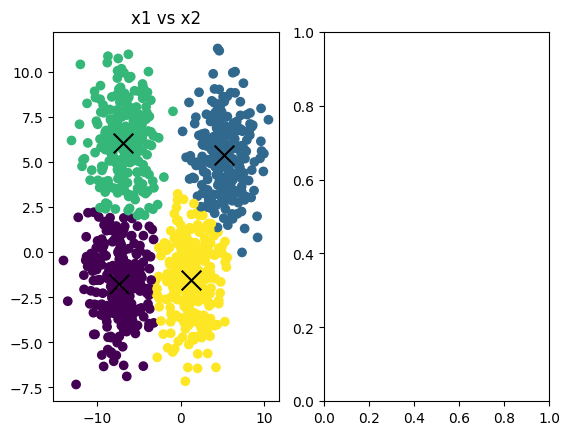

In [35]:
#Plot a scatter plot of your data using different color for each cluster. Also plot the centroids
fig, ax = plt.subplots(1,2)
ax[0].scatter(df.x1, df.x2, c=df.cluster)
ax[0].scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='x', s=200, c='black')
ax[0].set_title('x1 vs x2')

### Questions

Provides a detailed description of your results

Your response: With the use of four centers, we can properly divide the data into their four colors more or less accurately. Depending on which type of data we are truly managing we could then properly assign a cluster to any future data just like with the ballons excersice. Although this may be more inaccurate when dealin with data that is too scattered.

## d) Elbow plot

Compute the Elbow plot

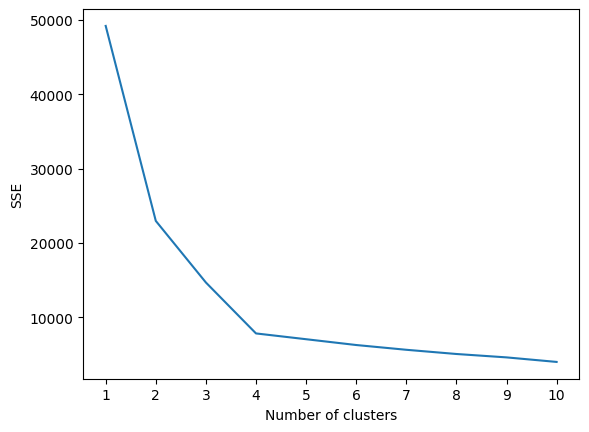

In [36]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k).fit(np.array(df[['x1','x2']]))
    sse.append(kmeans.inertia_)

sns.lineplot(x=list(range(1, 11)), y=sse)
plt.xticks(list(range(1, 11)))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

### Questions

What is the best number of clusters K? (argue your response)

Your response: I would go for 4 or 5 clusters as beyond this point the gain in accuracy of the model doesn't improve in any significant way.


Does this number of clusters agree with your inital guess? (argue your response, no problem at all if they do not agree)

Your response: Yes, when I visualized the data I assumumed 4 would be the better guess as I noticed the data clumping into groups of 2,3 and 4. I assumed using 4 would also give good cover for the groups of 2 as these could be split without mayor complications.



# PART 2

## Do clustering using the "digits" dataset

1) Load the dataset from "sklearn.datasets"


In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

2) Plot some of the observations (add in the title the label/digit of that obserbation)

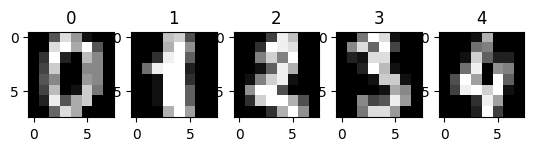

In [ ]:
fig, ax = plt.subplots(1,5)
for i in range(5):
  ax[i].imshow(digits.images[i], cmap='gray')
  ax[i].set_title(digits.target[i])
plt.show()

3) Do K means clustering in the following cases:

* KmeansAll: Using all 64 variables/pixels/features

* Kmeans1row: Using only the 8 variables/pixels/features from the firt row

* Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

* Kmeans8row: Using only the 8 variables/pixels/
features from the eighth row


In [ ]:
#Do K means clustering in the following cases:

#KmeansAll: Using all 64 variables/pixels/features
K = 10
kmeans1 = KMeans(n_clusters=K, random_state=0).fit(digits.data)

print(kmeans1.labels_)

[8 9 9 ... 9 5 5]


In [ ]:
#Kmeans1row: Using only the 8 variables/pixels/features from the firt row
kmeans2 = KMeans(n_clusters=K, random_state=0).fit(digits.data[:,:8])

print(kmeans2.labels_)

[3 8 7 ... 8 3 0]


In [ ]:
#Kmeans4row: Using only the 8 variables/pixels/features from the fourth row

kmeans3 = KMeans(n_clusters=K, random_state=0).fit(digits.data[:,31:38])

print(kmeans3.labels_)

[2 5 8 ... 8 1 3]


In [ ]:
#Kmeans8row: Using only the 8 variables/pixels/ features from the eighth row

kmeans4 = KMeans(n_clusters=K, random_state=0).fit(digits.data[:,56:63])

print(kmeans4.labels_)

[1 6 9 ... 1 6 6]


4) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the clusterization was correct or incorrect

In [ ]:
randomNumber = np.random.randint(0, 1797)

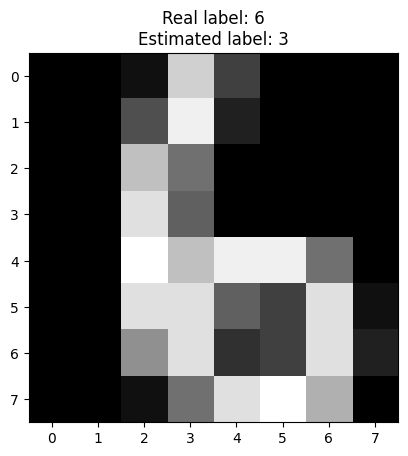

In [ ]:
plt.imshow(digits.images[randomNumber], cmap='gray')
plt.title(f'Real label: {digits.target[randomNumber]}\nEstimated label: {kmeans1.labels_[randomNumber]}')
plt.show()

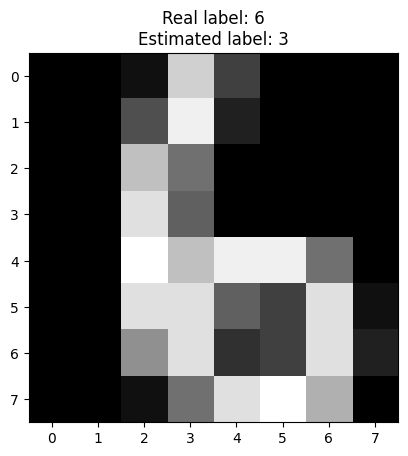

In [ ]:
plt.imshow(digits.images[randomNumber], cmap='gray')
plt.title(f'Real label: {digits.target[randomNumber]}\nEstimated label: {kmeans2.labels_[randomNumber]}')
plt.show()

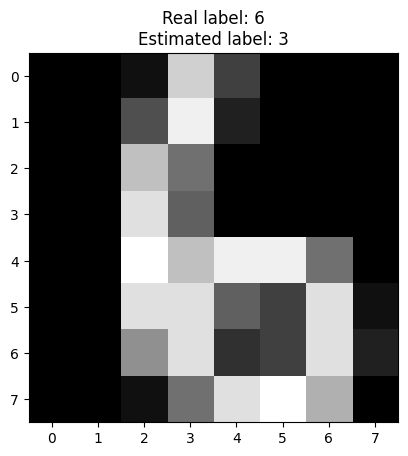

In [ ]:
plt.imshow(digits.images[randomNumber], cmap='gray')
plt.title(f'Real label: {digits.target[randomNumber]}\nEstimated label: {kmeans3.labels_[randomNumber]}')
plt.show()

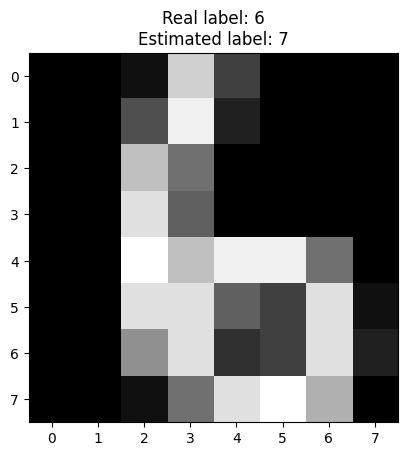

In [ ]:
plt.imshow(digits.images[randomNumber], cmap='gray')
plt.title(f'Real label: {digits.target[randomNumber]}\nEstimated label: {kmeans4.labels_[randomNumber]}')
plt.show()

5) Compute the Elbow plot

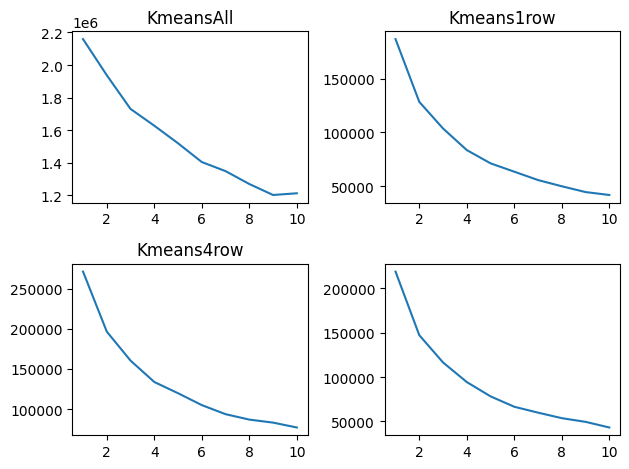

In [ ]:
sse1 = []
sse2 = []
sse3 = []
sse4 = []

K = range(1,11)

fig, ax = plt.subplots(2,2)
for k in K:
  kmeans1 = KMeans(n_clusters=k).fit(digits.data)
  kmeans2 = KMeans(n_clusters=k).fit(digits.data[:,:8])
  kmeans3 = KMeans(n_clusters=k).fit(digits.data[:,47:55])
  kmeans4 = KMeans(n_clusters=k).fit(digits.data[:,56:63])
  sse1.append(kmeans1.inertia_)
  sse2.append(kmeans2.inertia_)
  sse3.append(kmeans3.inertia_)
  sse4.append(kmeans4.inertia_)

ax[0][0].plot(K, sse1)
ax[0][0].set_title('KmeansAll')
ax[0][1].plot(K, sse2)
ax[0][1].set_title('Kmeans1row')
ax[1][0].plot(K, sse3)
ax[1][0].set_title('Kmeans4row')
ax[1][1].plot(K, sse4)
fig.tight_layout()
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the clusterization is better, with KmeansAll, Kmeans1row, Kmeans4row, or Kmeans8row).

Your response (argue your response): The KmeansAll provides much less uncertantiy than any of the other models. Even using a single cluster would yield much better results. As we can see in the diagrams the SSE of the KmeansAll is much smaller than any of the other Kmeans.

# PART 3
## Do classification using the "digits" dataset

1) Load the dataset from "sklearn.datasets"

In [ ]:
digits = load_digits()

2) Plot some of the observations  (add in the title the label/digit of that obserbation)

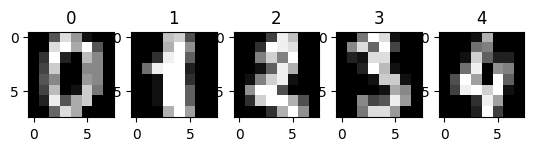

In [ ]:
fig, ax = plt.subplots(1,5)
for i in range(5):
  ax[i].imshow(digits.images[i], cmap='gray')
  ax[i].set_title(digits.target[i])
plt.show()

3) Split the dataset in train and test

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

4) Tune a classifier (Use the train set) in the following cases:

* ClassifierAll: Using all 64 variables/pixels/features

* Classifier1col: Using only the 8 variables/pixels/features from the firt column

* Classifier4col: Using only the 8 variables/pixels/features from the fourth column

* Classifier8col: Using only the 8 variables/pixels/
features from the eighth column

Note: in these four cases always use the same classification algorithm, e.g., a Suport Vector Machine


In [ ]:
#Tune a classifier (Use the train set) in the following cases:

#ClassifierAll: Using all 64 variables/pixels/features
from sklearn.svm import SVC

clf1 = SVC(kernel='linear')
clf1.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#Classifier1col: Using only the 8 variables/pixels/features from the firt column

clf2 = SVC(kernel='linear')
clf2.fit(X_train[:,:8], y_train)

SVC(kernel='linear')

In [ ]:
#Classifier4col: Using only the 8 variables/pixels/features from the fourth column
clf3 = SVC(kernel='linear')
clf3.fit(X_train[:,31:38], y_train)

SVC(kernel='linear')

In [ ]:
#Classifier8col: Using only the 8 variables/pixels/ features from the eighth column
clf4 = SVC(kernel='linear')
clf4.fit(X_train[:,56:63], y_train)

SVC(kernel='linear')

5) Make predictions (use the test set)

In [ ]:
predicitions1 = clf1.predict(X_test)

In [ ]:
predicitions2 = clf2.predict(X_test[:,:8])

In [ ]:
predicitions3 = clf3.predict(X_test[:,31:38])

In [ ]:
predicitions4 = clf4.predict(X_test[:,56:63])

6) Compute performance metrics

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predicitions1)

0.9777777777777777

In [ ]:
accuracy_score(y_test, predicitions2)

0.4111111111111111

In [ ]:
accuracy_score(y_test, predicitions3)

0.5694444444444444

In [ ]:
accuracy_score(y_test, predicitions4)

0.49722222222222223

7) Verify your results. Plot several observations from the same digit and add in the title the real label and the estimated label to check in what observations the classification was correct or incorrect

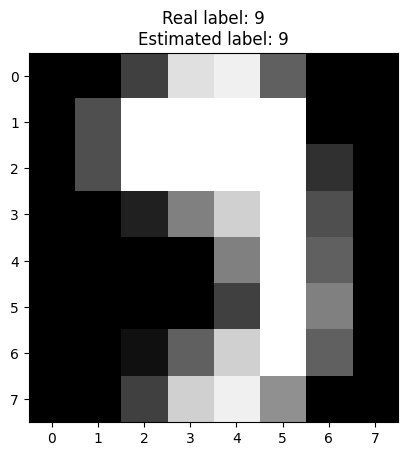

In [ ]:
randomNumber = np.random.randint(0, 360)

plt.imshow(X_test[randomNumber].reshape(8,8), cmap='gray')
plt.title(f'Real label: {y_test[randomNumber]}\nEstimated label: {predicitions1[randomNumber]}')
plt.show()

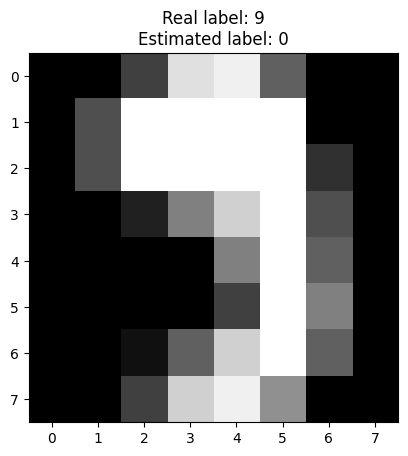

In [ ]:
plt.imshow(X_test[randomNumber].reshape(8,8), cmap='gray')
plt.title(f'Real label: {y_test[randomNumber]}\nEstimated label: {predicitions2[randomNumber]}')
plt.show()

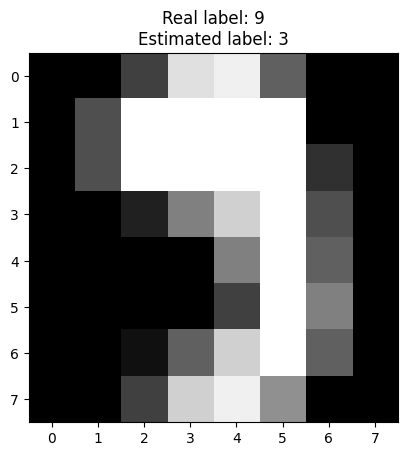

In [ ]:
plt.imshow(X_test[randomNumber].reshape(8,8), cmap='gray')
plt.title(f'Real label: {y_test[randomNumber]}\nEstimated label: {predicitions3[randomNumber]}')
plt.show()

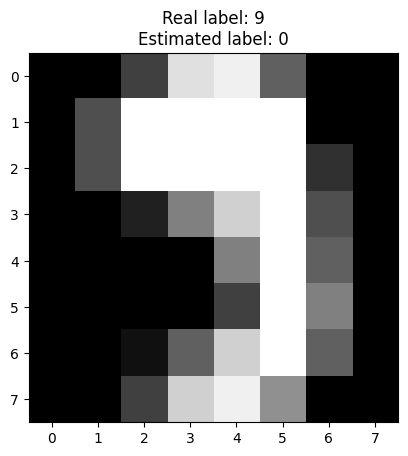

In [ ]:
plt.imshow(X_test[randomNumber].reshape(8,8), cmap='gray')
plt.title(f'Real label: {y_test[randomNumber]}\nEstimated label: {predicitions4[randomNumber]}')
plt.show()

### Questions

Provides a detailed description of your results (e.g., in which case the classification performance is better, with ClassifierAll, Classifier1col, Classifier4col, or Classifier8col).

Your response (argue your response): Using the classifierAll is the yields much better results with an accuracy of up to 97%. In the other cases, the other models yield accurary of around 50% at best. In the example above you can see the complete classifier correctly designs this image as a 9. While the 1 and 8 classifiers signal it as a 0. I imagine this is because 0 is the most common number whose borders are never colored. In the case of the 4 column model, I noticed a tendency towards 3.

# PART 4

## Descripción de tu percepcion del nivel de desarrollo de la subcompetencia

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Tu respuesta: En este caso siento que he podido ver de mejor manera la relacion entre distintas variables y como interactuan. Por ejemplo a la hora de hacer Kmeans pude determinar con cierta certeza el numero apropiado de cluster con solo ver la data por scatter plots. Ademas, en el ejercicio previo a este proyecto pude determinar con certeza el funcionamiento del dataset de digitos.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: Siento que esta competencia aun tiene mucho por desarollar. Sin embargo, esta clase me ha dejado bases solidas desde las cuales ir interactuando con mas modelos e ir comprendienod su funcionamiento asi como saber cuando utilizarlos con que tipo de informacion.